# Imports

In [22]:
import numpy as np
from iminuit.cost import ExtendedBinnedNLL
from Fit import Fit
from funcs import *
from stats import *
import scienceplots
plt.style.use(['grid'])

# Funcs

In [2]:
def G_R(w, R, R_L, L):
    return R/np.sqrt((R+R_L)**2 + (w*L)**2)

def fase_R(w, R, R_L, L):
    return np.arctan(w*L/(R+R_L))

def G_L(w, R, R_L, L):
    return np.sqrt( np.power( R_L*(R+R_L) + np.power(w*L,2) , 2) + np.power(w*R*L, 2) ) / ( np.power(R+R_L,2) + np.power(w*L,2) )

def fase_L(w, R, R_L, L, a):
    return np.arctan(w*R*L / ( R_L*(R+R_L) + np.power(w*L,2) ) ) + a

# RL

In [3]:
if 1:
    path_folder = 'data/RL/'
    V_res, V_l, fase_res, fase_l, freqs, V_res_err, V_l_err, fase_err = [], [], [], [], [], [], [], []

    for i in sorted([int(i) for i in os.listdir(path_folder)]):

        path = path_folder+str(i)+'/'

        CH1,SGN,MTH, V_SGN, V_MTH, zero_CH1, zero_SGN, zero_MTH, m1, m2, m3, dt_CH1, dt_MTH, V_SGN_err, V_MTH_err, zero_err = analize(path, i, force=True, prec=1e-8,verbose=True)
        
        # x=np.linspace(np.min(CH1[0]), np.max(CH1[0]), 100)

        # plt.figure(figsize=(10,4))
        # plt.plot(x, sine(x, **m1.values.to_dict()), label='CH1 fit', color='red')
        # plt.plot(x, sine(x, **m2.values.to_dict()), label='SGN fit', color='blue')
        # plt.plot(x, sine(x, **m3.values.to_dict()), label='MTH fit', color='green')
        
        # # plt.plot(CH1[0], CH1[1], label='CH1', color='red')
        # # plt.plot(SGN[0], SGN[1], label='SGN', color='blue')
        # # plt.plot(MTH[0], MTH[1], label='MTH', color='green')

        # plt.scatter(zero_CH1, 0, color='red', label='zero CH1')
        # plt.scatter(zero_SGN, 0, color='blue', label='zero SGN')
        # plt.scatter(zero_MTH, 0, color='green', label='zero MTH')
        # plt.legend(ncol=2)
        # plt.show()
        # print(i, dt_CH1, dt_MTH)

        V_res.append(V_SGN)
        V_l.append(V_MTH)
        V_res_err.append(V_SGN_err)
        V_l_err.append(V_MTH_err)
        fase_res.append(dt_CH1*i*2*np.pi)
        fase_l.append(dt_MTH*i*2*np.pi)
        freqs.append(i)
        fase_err.append(zero_err*i*2*np.pi)

    V_res = np.array(V_res)
    V_l = np.array(V_l)
    V_res_err = np.array(V_res_err)
    V_l_err = np.array(V_l_err)
    fase_res = np.array(fase_res)
    fase_l = np.array(fase_l)
    freqs = np.array(freqs)
    fase_err = np.array(fase_err)

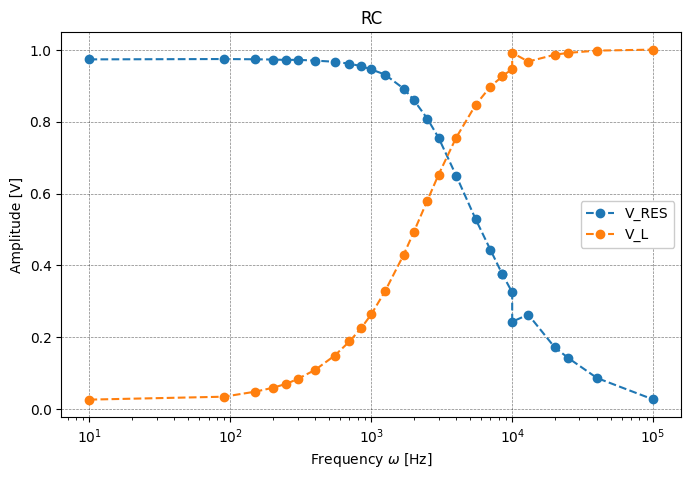

In [4]:
plt.figure(figsize=(8,5))
x = np.linspace(np.min(freqs),np.max(freqs),1000)

# plt.plot(x, H_R(x*2*np.pi, 1e3*12e-9, 0), label='Teorico')
# plt.plot(x, H_C(x*2*np.pi, 1e3*12e-9), label='Teorico')

plt.plot(freqs, V_res, 'o--', label='V_RES')
plt.plot(freqs, V_l, 'o--', label='V_L')
plt.title('RC')
plt.xlabel('Frequency $\omega$ [Hz]')
plt.ylabel('Amplitude [V]')
plt.legend()
plt.xscale('log')
plt.show()

C:\Users\yehan\AppData\Local\Temp\ipykernel_1172\2101964594.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


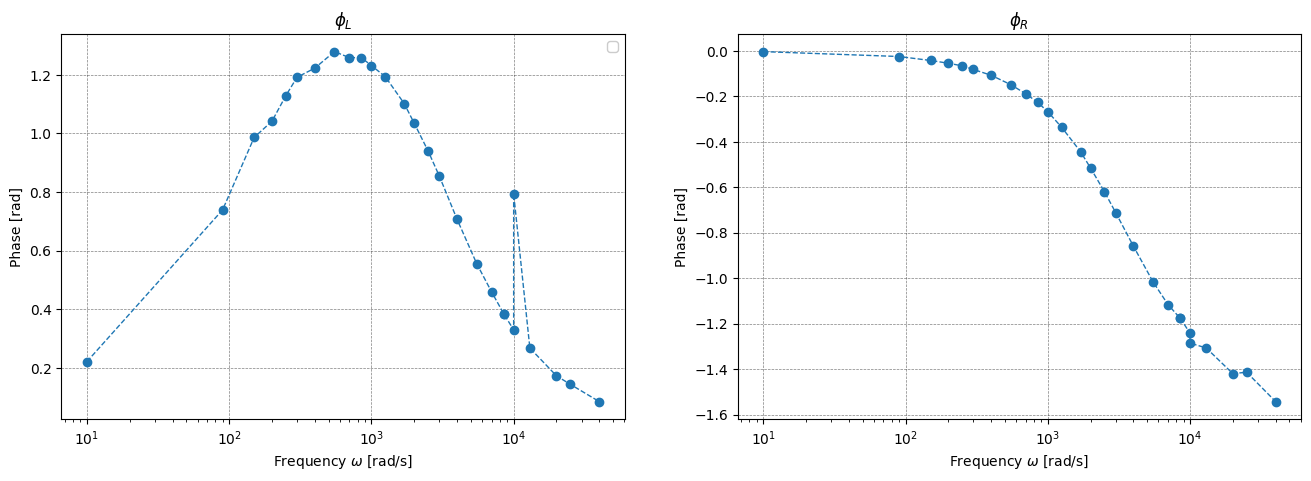

In [5]:
x = np.linspace(np.min(freqs),np.max(freqs),1000)

plt.subplots(1,2,figsize=(16,5))
plt.title('Dati')
plt.subplot(1,2,1)
plt.plot(freqs[:-1], -fase_l[:-1] + np.pi*2,'o--', lw=1)
plt.title('$\phi_L$')
plt.xlabel('Frequency $\omega$ [rad/s]')
plt.ylabel('Phase [rad]')
plt.legend()
plt.xscale('log')

plt.subplot(1,2,2)
plt.plot(freqs[:-1], -fase_res[:-1], 'o--', lw=1)
# plt.plot(x, fase_C(x*2*np.pi, 1e3, 12e-9, 0), label='Teorico')
# plt.plot(x, fase_R(x*2*np.pi, 1e3, 12e-9), label='Teorico')
plt.title('$\phi_R$')
plt.xlabel('Frequency $\omega$ [rad/s]')
plt.ylabel('Phase [rad]')
plt.xscale('log')

# plt.savefig('imgs/RC/fasi_no_log.jpeg', bbox_inches='tight', dpi=200)
plt.show()

# L

In [23]:
c = LeastSquares( freqs[np.arange(len(freqs))!=len(freqs)-6]*2*np.pi, -fase_l[np.arange(len(freqs))!=len(freqs)-6] +np.pi*2, 0.01, fase_L)
f_f = Minuit(c, R=995, R_L=39.9, L=40e-3, a=0)
f_f.fixed['R', 'R_L', 'a'] = True, False, True

f_f.migrad()
f_f.minos()
f_f.hesse()

print(f_f.values['L'], f_f.errors['L'])

0.044215675433331374 0.0003101015853923451


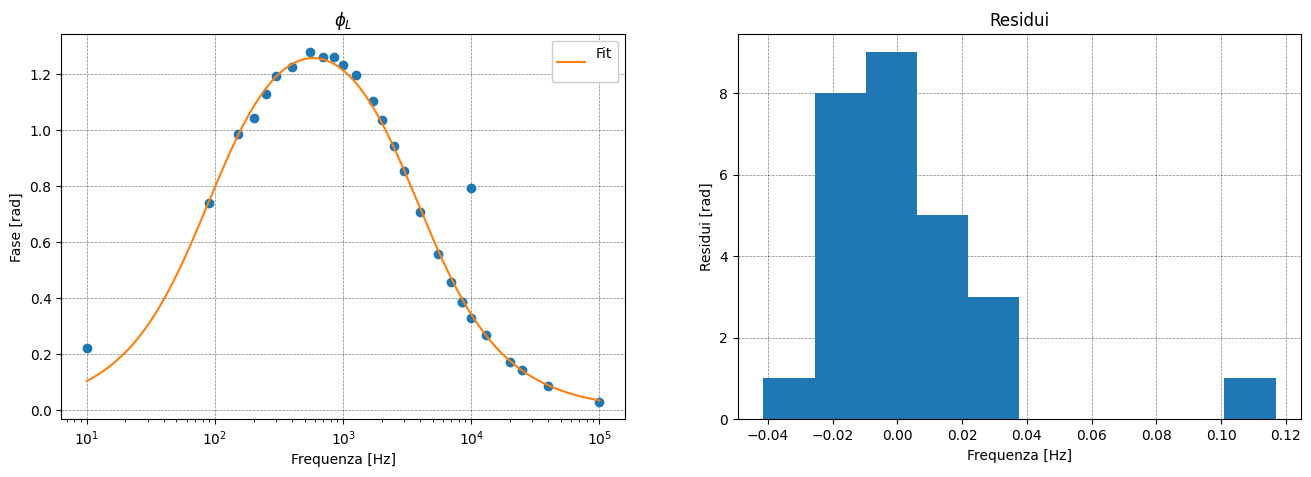

In [33]:
x = np.linspace(np.min(freqs),np.max(freqs),100000)
plt.subplots(1,2,figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(freqs, -fase_l + np.pi*2, 'o', lw=1)
plt.plot(x, fase_L(x*2*np.pi, **f_f.values.to_dict()), label='Fit\n')
plt.title('$\phi_L$')
plt.xlabel('Frequenza [Hz]')
plt.ylabel('Fase [rad]')
plt.legend()
plt.xscale('log')

res = -fase_l[np.arange(len(freqs))!=len(freqs)-6] + np.pi*2 - fase_L(freqs[np.arange(len(freqs))!=len(freqs)-6]*2*np.pi, **f_f.values.to_dict())
plt.subplot(1,2,2)
# plt.plot(freqs[np.arange(len(freqs))!=len(freqs)-6], res, 'o--', lw=1)

plt.hist(res, bins=10)
plt.title('Residui')
plt.xlabel('Frequenza [Hz]')
plt.ylabel('Residui [rad]')
# plt.xscale('log')
plt.show()


In [30]:
a, b = np.histogram(res, bins=10)
c = ExtendedBinnedNLL(a,b, normal_scaled_cdf)
m = Minuit(c, mu=0, sigma=1, scale=30)
m.migrad()
m.minos()
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 18.06 (χ²/ndof = 2.6)      │              Nfcn = 536              │
│ EDM = 2.06e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  -0.005   │   0.011   │   -0.016   │   0.009    │         │         │       │
│ 1 │ sigma │   0.032   │   0.008   │   -0.006   │   0.011    │         │         │       │
│ 2 │ scale │    31     │     7     │     -6     │     10     │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          mu           │         sigma         │         scale         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.016   │   0.009   │  -0.006   │   0.011   │    -6     │    10     │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬───────────────────────────────┐
│       │        mu     sigma     scale │
├───────┼───────────────────────────────┤
│    mu │  0.000114  -0.06e-3 -41.89e-3 │
│ sigma │  -0.06e-3  5.92e-05  29.05e-3 │
│ scale │ -41.89e-3  29.05e-3      53.6 │
└───────┴───────────────────────────────┘

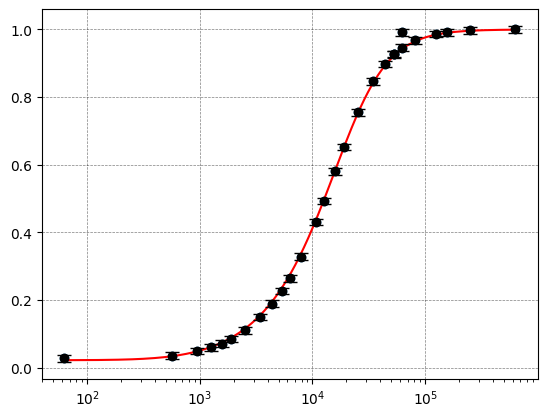

In [8]:
f_m = Fit(freqs*2*np.pi, V_l, G_L, 0.01, kwargs={'R':1e3, 'R_L':50, 'L':0.04})
f_m.fit()
f_m.visualize(npoints=30000)
plt.xscale('log')

In [9]:
# x = np.linspace(np.min(freqs[1:]),np.max(freqs[1:]),1000000)
# plt.subplots(1,2,figsize=(16,5))

# plt.subplot(1,2,1)
# plt.plot(freqs[1:], V_l[1:], 'o--', lw=1, label='Dati', c='k')
# plt.plot(x, G_L(x*2*np.pi, **f_m.values), label='Fit', c='r')
# plt.xscale('log')
# plt.title("$|H_L|$")
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Amplitude [V]')
# plt.legend()

# plt.subplot(1,2,2)
# plt.plot(freqs[1:], -fase_l[1:] + np.pi*2,'o', lw=1, label='Dati', c='k')
# plt.plot(x, fase_L(x*2*np.pi, **f_f.values), label='Fit', c='r')
# plt.scatter(freqs[-6], -fase_l[-6] + np.pi*2, marker='x', s=100, color='red', label='Punto scartato')
# plt.xscale('log')
# plt.title('$\phi_L$')
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Phase [rad]')
# plt.legend()


# R

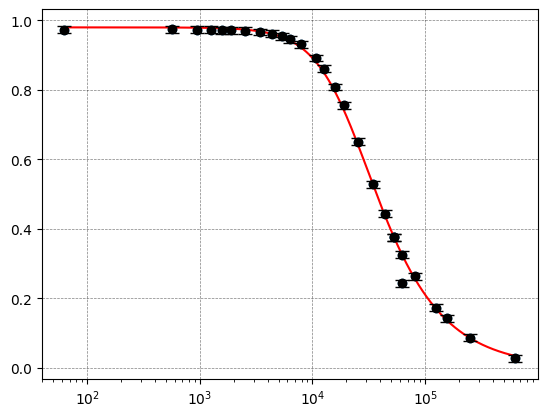

In [10]:
f_m = Fit(freqs*2*np.pi, V_res, G_R, 0.01, kwargs={'R':1e3, 'R_L':50, 'L':0.04})
f_m.fit()
f_m.visualize(npoints=30000)
plt.xscale('log')


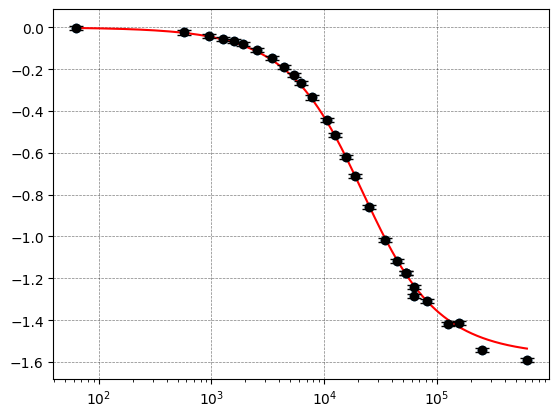

In [11]:
f_f = Fit( (freqs*2*np.pi) , -fase_res, fase_R, 0.01, kwargs={'R':1e3, 'R_L':50, 'L':12e-9})
f_f.fit()
f_f.visualize(npoints=30000)
plt.xscale('log')

In [12]:
# x = np.linspace(np.min(freqs),np.max(freqs),1000000)
# plt.subplots(1,2,figsize=(16,5))

# plt.subplot(1,2,1)
# plt.plot(freqs, V_res, 'o', lw=1, label='Dati', c='k')
# plt.plot(x, G_R(x*2*np.pi, **f_m.values), label='Fit', c='r')
# plt.xscale('log')
# plt.title("$|H_R|$")
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Amplitude [V]')
# plt.legend()

# plt.subplot(1,2,2)
# plt.plot(freqs, -fase_res,'o', lw=1, label='Dati', c='k')
# plt.plot(x, fase_R(x*2*np.pi, **f_f.values), label='Fit', c='r')
# plt.xscale('log')
# plt.title('$\phi_R$')
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Phase [rad]')
# plt.legend()

# plt.savefig("imgs/RL/fit_L.pdf", bbox_inches="tight")